In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

In [5]:
default = load_data("Default")

In [8]:
X = default[["income","balance"]]
y = default["default"]

In [11]:
logistic = LogisticRegression(penalty=None)
full_logistic = logistic.fit(X,y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [20]:
train_logistic = logistic.fit(X_train,y_train)
y_pred = train_logistic.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.9742


In [35]:
y_test = y_test.transform(lambda x : x=="Yes")

C:\Users\basti\anaconda3\envs\islp\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


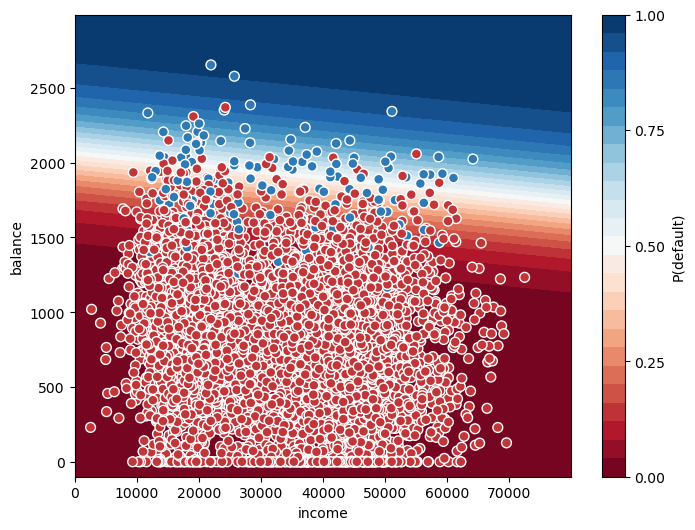

In [36]:
xx, yy = np.mgrid[0:80000:100, -100:3000:10]
grid = np.c_[xx.ravel(), yy.ravel()]                    # https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy
probs = train_logistic.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8,6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",    # 25 levels
                     vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("P(default)")
ax_c.set_ticks([0,0.25,0.5,.75,1])

ax.scatter(X_test['income'], X_test['balance'], c=y_test, s=50, 
          cmap="RdBu", vmin=-0.2, vmax=1.2,
          edgecolor="white", linewidth=1)

ax.set(xlabel="income", ylabel="balance");


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99      4841
         Yes       0.70      0.33      0.45       159

    accuracy                           0.97      5000
   macro avg       0.84      0.66      0.72      5000
weighted avg       0.97      0.97      0.97      5000



In [24]:
loss = []
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    train_logistic = logistic.fit(X_train,y_train)
    y_pred = train_logistic.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    loss.append(1-score)
print(loss)
print(np.mean(loss))
print(np.std(loss))

[0.025800000000000045, 0.027800000000000047, 0.023599999999999954]
0.025733333333333348
0.0017152907107025194


In [41]:
X = default[["income","balance", "student"]]
X = pd.get_dummies(X, drop_first=True, dtype=int)
y = default["default"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [44]:
train_logistic = logistic.fit(X_train,y_train)
y_pred = train_logistic.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.9744


In [49]:
loss = []
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    train_logistic = logistic.fit(X_train,y_train)
    y_pred = train_logistic.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    loss.append(1-score)
print(loss)
print(np.mean(loss))
print(np.std(loss))

[0.026800000000000046, 0.02739999999999998, 0.026000000000000023]
0.02673333333333335
0.0005734883511361592
